# Ch8: Approximation Theory

$$\text{葛雨辰 201800150053}$$

# 1 Introduction 

In this chapter, we implement the algorithms of approximation theory. The problem sheets are: P494 5, P506 3c 3d 3e, P516 (1b) 3, P517(7).

## 2 Least Square Polynomial (P494 5)

We implement the Least Square Polynomial algorithm. The codes run as below.

my fitting parameters: [  72.084518 -194.138241] with error: [329.013193]


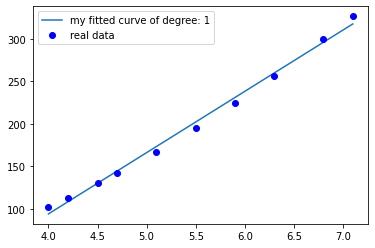

my fitting parameters: [ 6.618211 -1.143523  1.23556 ] with error: [0.001443]


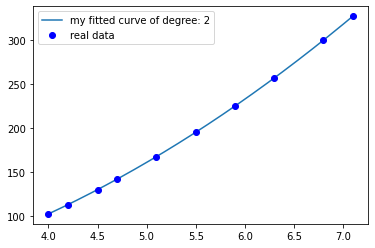

my fitting parameters: [-0.013675  6.845578 -2.379221  3.429094] with error: [0.000527]


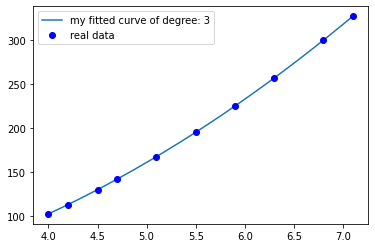

In [54]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

np.set_printoptions(precision = 6)

# fit function
def fit_func(p, x):
    """
    numpy.poly1d([1,2,3]) -> 1(x*x) + 2(x) + 3
    """
    f = np.poly1d(p)
    return f(x)
 
def residuals_func(p, x, y):
    res = fit_func(p, x) - y
    return res
 
def leastsq_mutifunc(x, y, m):
    x = np.array(x)
    y = np.array(y)
 
    assert m <= x.shape[0], f"the number of m({m}) need less than x's size({x.shape[0]})"
    assert x.shape[0] == y.shape[0], f"the size of x({x.shape[0]}) must equal to y's size({y.shape[0]}"
    x_mat = np.zeros((x.shape[0], m+1))
    for i in range(x.shape[0]):
        x_mat_h = np.zeros((1, m+1))
        for j in range(m+1):
            x_mat_h[0][j] = x[i] ** (m-j)
        x_mat[i] = x_mat_h
    theta = np.dot(np.dot(np.linalg.inv(np.dot(x_mat.T, x_mat)), x_mat.T), y.T)
    return theta
 
def fitting(x, y, M=0):
    # initialize
    p_init = np.random.rand(M + 1)
    # LS algorithm
    my_p_lsq = leastsq_mutifunc(x, y, m=M)
    error = np.linalg.norm(fit_func(my_p_lsq, x)-y,ord=2) **2
    error = np.array([error])
    print(f'my fitting parameters: {my_p_lsq} with error: {error}')
 
    # visualization
    x_points = np.linspace(np.min(x), np.max(x), int(x.shape[0] * 10000))
    plt.plot(x_points, fit_func(my_p_lsq, x_points), label=f'my fitted curve of degree: {M}')
    plt.plot(x, y, 'bo', label='real data')
    plt.legend()
    plt.show()
    return
 
if __name__ == '__main__':
    x = np.array([4,4.2,4.5,4.7,5.1,5.5,5.9,6.3,6.8,7.1])
    y = np.array([102.56,113.18,130.11,142.05,167.53,195.14,224.87,256.73,299.5,326.72])
 
    p_lsq_1 = fitting(x, y, M=1)
    p_lsq_1 = fitting(x, y, M=2)
    p_lsq_1 = fitting(x, y, M=3)

We gether together the results below in the table .

|   Method(P494 5)  |  P(x) | Error |
|  ----  | ----  | ---- |
| $$n=1$$ | $$ 72.084518x-194.138241 $$ | 329.013193 |
| $$n=2$$  | $$ 6.618211x^2-1.143523x+ 1.23556 $$ | 0.001443 |
| $$n=3$$  | $$ -0.013675x^3+6.845578x^2-2.379221x+3.429094 $$ | 0.000527 |
| $$y=be^{ax}$$  | $$ 24.26e^{0.3724x} $$ | 417.6910 |
| $$y=ba^{x}$$  | $$ 6.239\times 2.0195^{x} $$ | 659450 |

## 3 Orthogonal Polynomial and Least Square Approximation (P506 3c 3d 3e)

We use basis $\{1,x,x^2\}$ to approximate P506 3c,3d,3e.

In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt # plt: show picture 
import sympy 
from scipy import integrate

np.set_printoptions(precision = 6)
x = sympy.symbols('x') # symbolize x

def Lf(n):
    B = [sympy.Symbol('m') for w in range(n)]
    for i in range(n):
        B[i]=x**i
    return B


def sum_d(f,a,b,n): # calculate d
    B = [sympy.Symbol('m') for w in range(n)]
    v = np.zeros(n)
    for i in range(n):
        B[i]=Lf(n)[i]*f 
        v[i]=sympy.integrate(B[i],(x,a,b))
    return v

# Hilbert Matrix
def can_f(f,a,b,n): #  calculate a_0,...,a_n
    q=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i==j):
                q[i][j]=(2*i+1)/2
            else:
                q[i][j]=0
    #print(q)
    s=v=np.zeros(n)
    s=sum_d(f,a,b,n) # 求d_i
    v=np.dot(q,s) # H^-1*d
    return v

f_1 = 1/(x+2)
f_2 = math.e**x
f_3 = 1/2*sympy.cos(x)+1/3*sympy.sin(2*x)

# n=2 for two times least squares approximation
z_11 = can_f(f_1,-1,1,2)
t_11 = sympy.simplify(z_11[0]*Lf(2)[0]+z_11[1]*Lf(2)[1]) # simplify the polynomial 
error = sympy.integrate((f_1-t_11)**2,(x,-1,1))
print(f'The linear approximation of 3c is: {t_11} with error:{error}.')

# n=3 for two times least squares approximation
z_12 = can_f(f_1,-1,1,3)
t_12 = sympy.simplify(z_12[0]*Lf(3)[0]+z_12[1]*Lf(3)[1]+z_12[2]*Lf(3)[2]) 
error = sympy.integrate((f_1-t_12)**2,(x,-1,1))
print(f'The quadratic approximation of 3c is: {t_12} with error:{error}.')

print()

# n=2 for two times least squares approximation
z_21 = can_f(f_2,-1,1,3)
t_21 = sympy.simplify(z_21[0]*Lf(2)[0]+z_21[1]*Lf(2)[1]) 
error = sympy.integrate((f_2-t_21)**2,(x,-1,1))
print(f'The linear approximation of 3d is: {t_21} with error:{error}.')

# n=3 for two times least squares approximation
z_22 = can_f(f_2,-1,1,3)
t_22 = sympy.simplify(z_22[0]*Lf(3)[0]+z_22[1]*Lf(3)[1]+z_22[2]*Lf(3)[2]) 
error = sympy.integrate((f_2-t_22)**2,(x,-1,1))
print(f'The quadratic approximation of 3d is: {t_22} with error:{error}.')

print()

# n=2 for two times least squares approximation
z_31 = can_f(f_3,-1,1,3)
t_31 = sympy.simplify(z_31[0]*Lf(2)[0]+z_31[1]*Lf(2)[1]) 
error = float(sympy.integrate((f_3-t_31)**2,(x,-1,1)))
print(f'The linear approximation of 3e is: {t_11} with error:{error}.')

# n=3 for two times least squares approximation
z_32 = can_f(f_3,-1,1,3)
t_32 = sympy.simplify(z_32[0]*Lf(3)[0]+z_32[1]*Lf(3)[1]+z_32[2]*Lf(3)[2]) 
error = float(sympy.integrate((f_3-t_32)**2,(x,-1,1)))
print(f'The quadratic approximation of 3e is: {t_12} with error:{error}.')

# assignation calculation
# print(t.subs(x,1))

The linear approximation of 3c is: 0.549306144334055 - 0.295836866004329*x with error:0.00484588540220265.
The quadratic approximation of 3c is: 0.986122886681097*x**2 - 0.295836866004329*x + 0.549306144334055 with error:0.338115027310853.

The linear approximation of 3d is: 1.10363832351433*x + 1.1752011936438 with error:0.0526530173437118.
The quadratic approximation of 3d is: 2.19721155650458*x**2 + 1.10363832351433*x + 1.1752011936438 with error:1.56444509291832.

The linear approximation of 3e is: 0.549306144334055 - 0.295836866004329*x with error:0.015378056892182081.
The quadratic approximation of 3e is: 0.986122886681097*x**2 - 0.295836866004329*x + 0.549306144334055 with error:0.2077891756592254.


Then we use Legendre basis to approximate P506 3c,3d,3e. First we implement the Legendr polynomial as below by defining a function P.

In [56]:
import sympy

x = sympy.symbols('x')

def P(point):
    if point == 0:
        return 1
    elif point == 1:
        return x
    p0 = 1
    p1 = x
    for i in range(point - 1):
        temp = ((2 * i + 3) * x * p1 - (i + 1) * p0) / (i + 2)
        p0 = p1
        p1 = temp
    return p1

Then we run the codes as follows to get the result.

In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt # plt: show picture
import sympy 
from scipy import integrate

x = sympy.symbols('x') # symbolize x

def Lf(n):
    B = [sympy.Symbol('m') for w in range(n)]
    for i in range(n):
        B[i]=P(i)
    return B


def sum_d(f,a,b,n): # calculate d
    B = [sympy.Symbol('m') for w in range(n)]
    v = np.zeros(n)
    for i in range(n):
        B[i]=Lf(n)[i]*f 
        v[i]=sympy.integrate(B[i],(x,a,b))
    return v

# Hilbert Matrix
def can_f(f,a,b,n): #  calculate a_0,...,a_n
    q=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i==j):
                q[i][j]=(2*i+1)/2
            else:
                q[i][j]=0
    #print(q)
    s=v=np.zeros(n)
    s=sum_d(f,a,b,n) # 求d_i
    v=np.dot(q,s) # H^-1*d
    return v

f_1 = 1/(x+2)
f_2 = math.e**x
f_3 = 1/2*sympy.cos(x)+1/3*sympy.sin(2*x)

# n=2 for two times least squares approximation
z_11 = can_f(f_1,-1,1,2)
t_11 = sympy.simplify(z_11[0]*Lf(2)[0]+z_11[1]*Lf(2)[1]) # simplify the polynomial 
error = float(sympy.integrate((f_1-t_11)**2,(x,-1,1)))
print(f'The linear approximation of 3c with legendre basis is: {t_11} with error:{error}.')

# n=3 for two times least squares approximation
z_12 = can_f(f_1,-1,1,3)
t_12 = sympy.simplify(z_12[0]*Lf(3)[0]+z_12[1]*Lf(3)[1]+z_12[2]*Lf(3)[2]) 
error = float(sympy.integrate((f_1-t_12)**2,(x,-1,1)))
print(f'The quadratic approximation of 3c with legendre basis is: {t_12} with error:{error}.')

print()

# n=2 for two times least squares approximation
z_21 = can_f(f_2,-1,1,3)
t_21 = sympy.simplify(z_21[0]*Lf(2)[0]+z_21[1]*Lf(2)[1]) # simplify the polynomial 
error = float(sympy.integrate((f_2-t_21)**2,(x,-1,1)))
print(f'The linear approximation of 3d with legendre basis is: {t_21} with error:{error}.')

# n=3 for two times least squares approximation
z_22 = can_f(f_2,-1,1,3)
t_22 = sympy.simplify(z_22[0]*Lf(3)[0]+z_22[1]*Lf(3)[1]+z_22[2]*Lf(3)[2])
error = float(sympy.integrate((f_2-t_22)**2,(x,-1,1)))
print(f'The quadratic approximation of 3d with legendre basis is: {t_22} with error:{error}.')

print()

# n=2 for two times least squares approximation
z_31 = can_f(f_3,-1,1,3)
t_31 = sympy.simplify(z_31[0]*Lf(2)[0]+z_31[1]*Lf(2)[1])   
error = float(sympy.integrate((f_3-t_31)**2,(x,-1,1)))
print(f'The linear approximation of 3e with legendre basis is: {t_11} with error:{error}.')

# n=3 for two times least squares approximation
z_32 = can_f(f_3,-1,1,3)
t_32 = sympy.simplify(z_32[0]*Lf(3)[0]+z_32[1]*Lf(3)[1]+z_32[2]*Lf(3)[2])
error = float(sympy.integrate((f_3-t_32)**2,(x,-1,1)))
print(f'The quadratic approximation of 3e with legendre basis is: {t_12} with error:{error}.')

# assignation calculation
# print(t.subs(x,1))

The linear approximation of 3c with legendre basis is: 0.549306144334055 - 0.295836866004329*x with error:0.004845885402202654.
The quadratic approximation of 3c with legendre basis is: 0.158878453779762*x**2 - 0.295836866004329*x + 0.496346659740801 with error:0.0003583541887870467.

The linear approximation of 3d with legendre basis is: 1.10363832351433*x + 1.1752011936438 with error:0.052653017343711805.
The quadratic approximation of 3d with legendre basis is: 0.536721525971058*x**2 + 1.10363832351433*x + 0.996294018320115 with error:0.001440573532033751.

The linear approximation of 3e with legendre basis is: 0.549306144334055 - 0.295836866004329*x with error:0.015378056892182081.
The quadratic approximation of 3e with legendre basis is: 0.158878453779762*x**2 - 0.295836866004329*x + 0.496346659740801 with error:0.005757187697047489.


Therefore we gather the information in the two table below.

| $$\text{P506 3: lin/qua approx with basis} \{1,x,x^2\}$$  |  $$P_1(x)$$ | Error | $$P_2(x)$$ | Error |
|  ----  | ----  | ---- | ---- | ---- |
| $$\frac{1}{x+2}$$ | $$ 0.549306 - 0.295837x $$ | 0.004846 | $$ 0.986123x^2 - 0.295837x + 0.549306 $$ | 0.338115 |
| $$e^x$$  | $$ 1.103638x + 1.175201 $$ | 0.052653 | $$ 2.197211x^2 + 1.103638x + 1.175201 $$ | 1.564445 |
| $$\frac{1}{2}cosx+\frac{1}{3}sin(2x)$$  | $$ 0.549306- 0.295837x $$ | 0.015378 | $$ 0.986123x^2 - 0.295837x + 0.549306$$ | 0.207789 |

| $$\text{P506 3: lin/qua approx with Legendre basis}$$  |  $$P_1(x)$$ | Error | $$P_2(x)$$ | Error |
|  ----  | ----  | ---- | ---- | ---- |
| $$\frac{1}{x+2}$$ | $$ 0.549306-0.295837x $$ | 0.004846 | $$ 0.158878x^2 - 0.295837x + 0.496347 $$ | 0.000358 |
| $$e^x$$  | $$ 1.103638x + 1.175201 $$ | 0.052653 | $$ 0.536722x^2 + 1.103638x + 0.996294 $$ | 0.001441 |
| $$\frac{1}{2}cosx+\frac{1}{3}sin(2x)$$  | $$ 0.549306 - 0.295837x $$ | 0.015378 | $$ 0.158878x^2 - 0.295837x + 0.496347 $$ | 0.005757 |

We see that 
1. For linear approximation, the usual linear approximation works as good as linear approximation with Legendre basis.
2. Quadratic approximation usually works better than  linear approximation.
3. For quadratic approximation, the usual linear approximation works worse than linear approximation with Legendre basis.

## 4 (P516 1b)

We apply the zeros of $\tilde{T}_{3}$ to construct an interpolating poynomial of degree 2 for the function $f(x):=sinx$ on $[-1,1]$. Then we run the codes as follows to get the result.

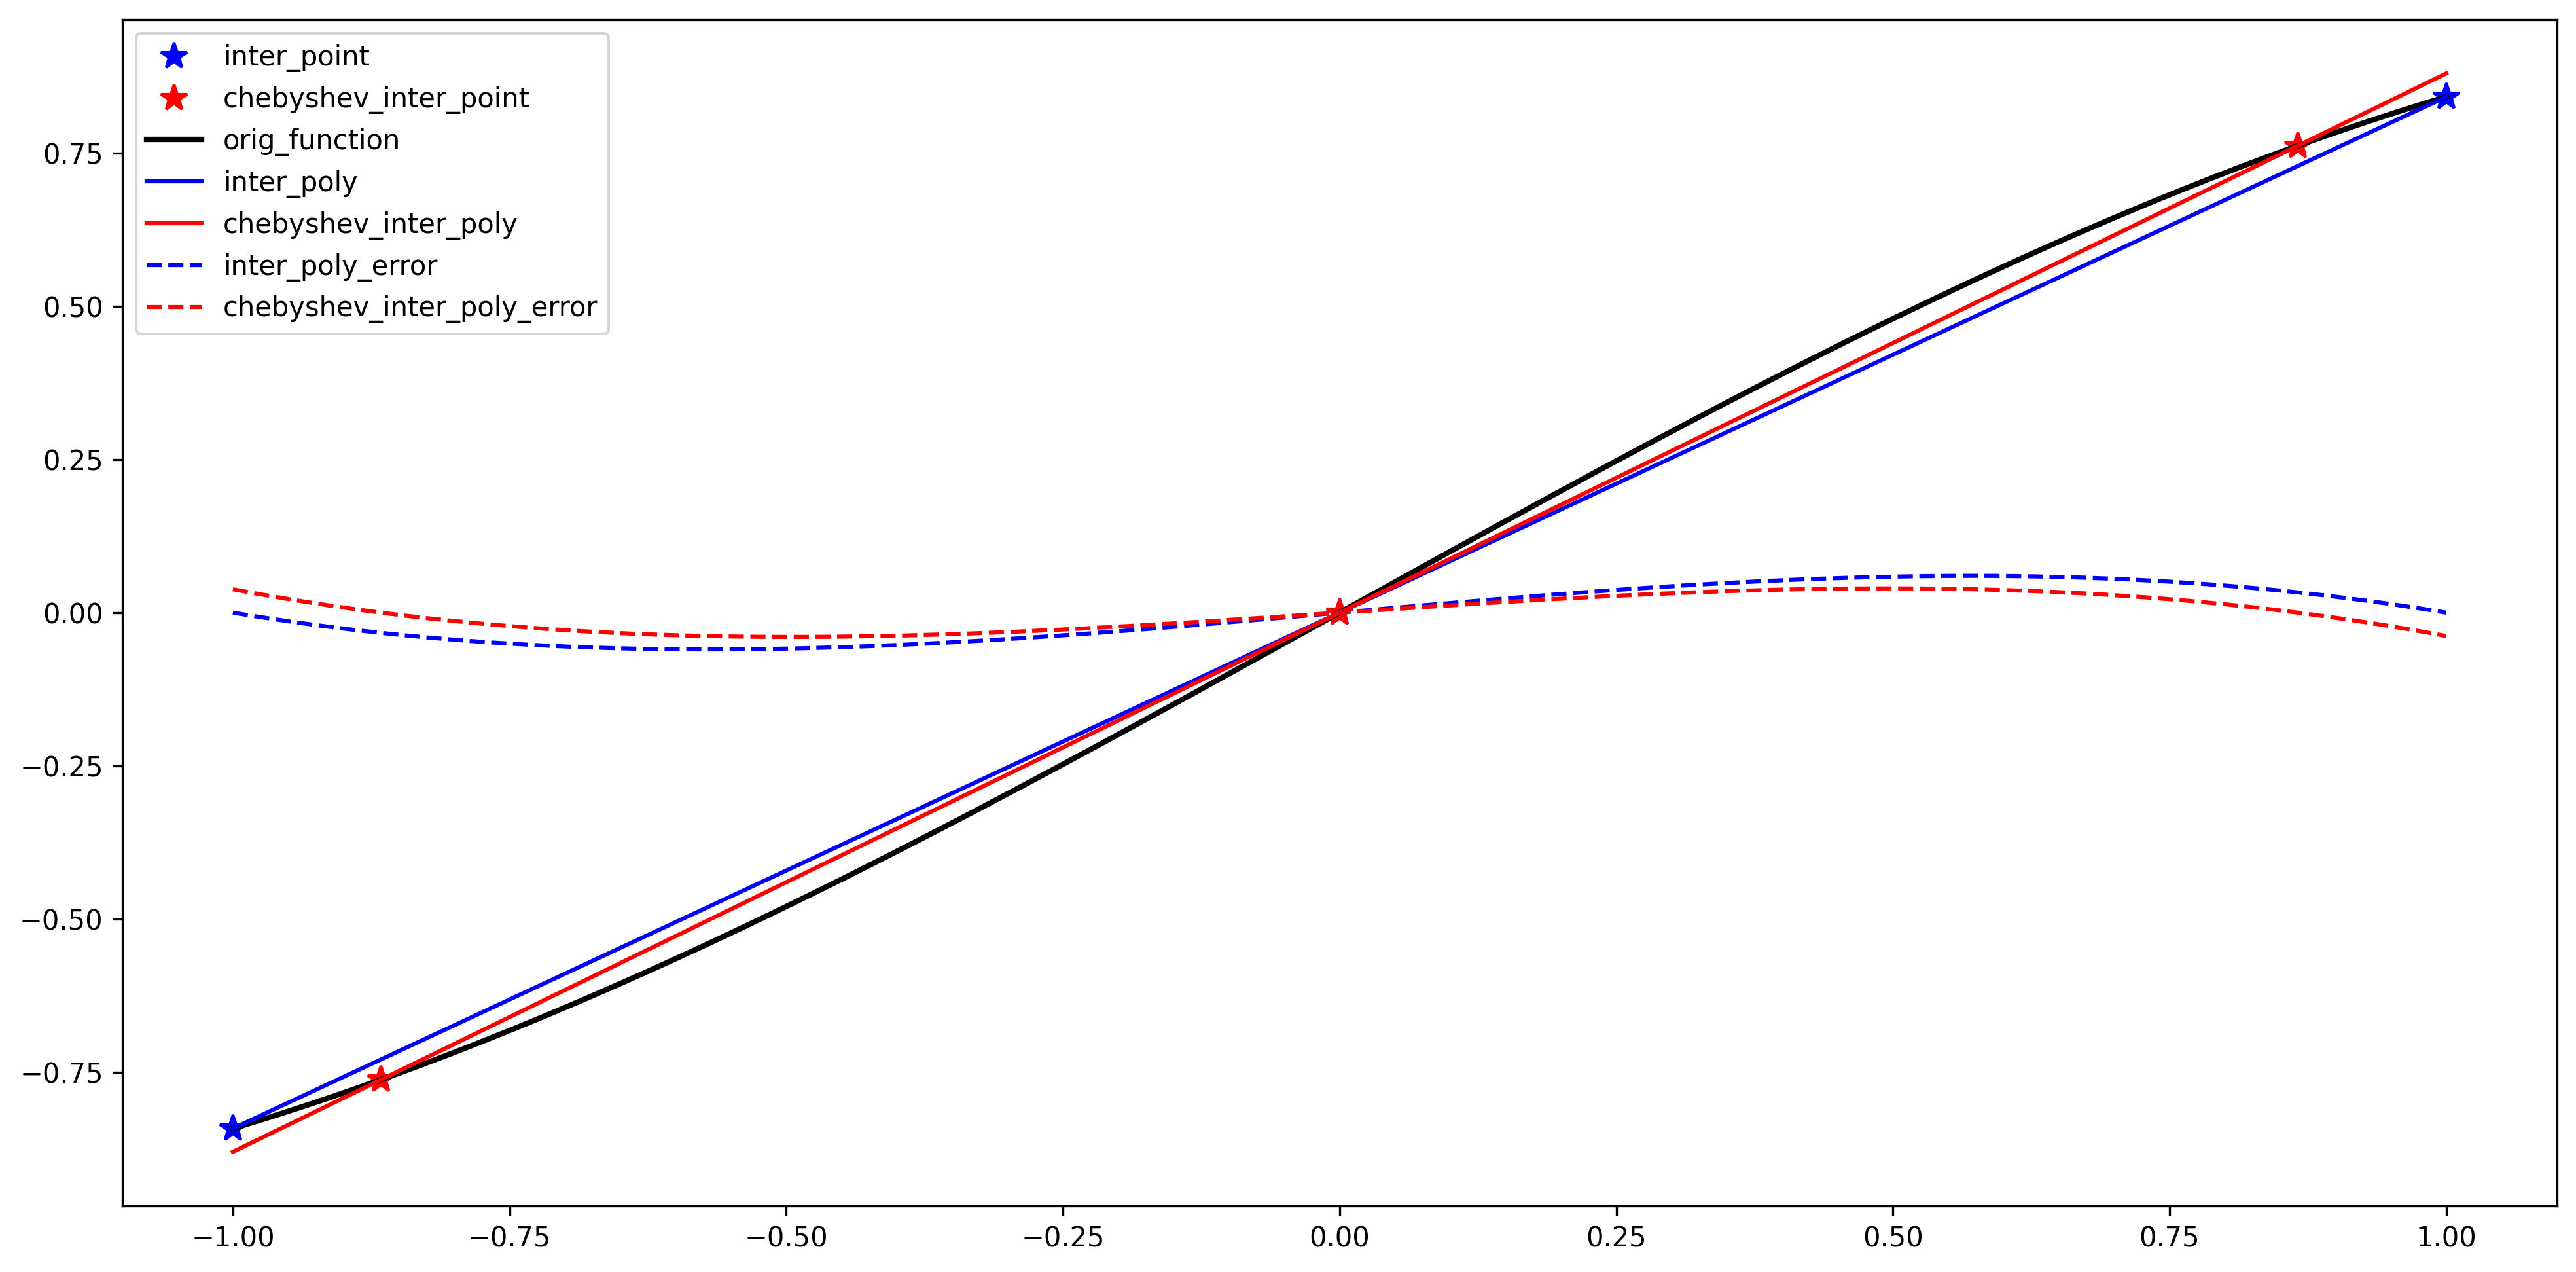

The error between original function and interpolation polynomial with equally spaced nodes is:
[ 0.       -0.044179 -0.05976  -0.05283  -0.030375  0.        0.030375
  0.05283   0.05976   0.044179  0.      ]
The error between original function and interpolation polynomial with nodes at the roots of Chbyshev poynomial is:
[ 3.813368e-02 -1.367236e-02 -3.687968e-02 -3.757648e-02 -2.274840e-02
 -7.372088e-18  2.274840e-02  3.757648e-02  3.687968e-02  1.367236e-02
 -3.813368e-02]
The output of real function is:
[-0.841471 -0.717356 -0.564642 -0.389418 -0.198669  0.        0.198669
  0.389418  0.564642  0.717356  0.841471]
The output of interpolation polynomial with equally spaced nodes is:
[-0.841471 -0.673177 -0.504883 -0.336588 -0.168294  0.        0.168294
  0.336588  0.504883  0.673177  0.841471]
The output of interpolation polynomial with nodes at the roots of Chbyshev poynomial is:
[-8.796047e-01 -7.036837e-01 -5.277628e-01 -3.518419e-01 -1.759209e-01
  7.372088e-18  1.759209e-01  3.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
 
def inter_x(a, b, n):
    """  
    :param a: left endpoint of interpolating poynomial
    :param b: right endpoint of interpolating poynomial
    :param n: number of interpolating points
    :return: interpolating vectors
    """
    x = np.zeros(n)
    h = (b - a) / (n-1)
    for i in range(n):
        x[i] = a + i * h
    return x
 
def inter_y(x, f):
    n = np.size(x)
    y = np.zeros(np.size(x))
    for i in range(n):
        y[i] = f(x[i])
    return y
  
def fun(x):
    return np.sin(x)
 
def my_lagrange(x, inx, iny):
    num = np.zeros(np.size(inx))    
    for i in range(np.size(inx)):
        num[i] = i
    mul11, mul12, mul21, mul22 = 1, 1, 1, 1
    ploy = 0
    for i in range(np.size(iny)):
        arr1 = num[:i]      # (beginning ~ i-1)
        arr2 = num[i+1:]    # (i+1 ~ end)
        for j in range(np.size(arr1)):
            temp1 = int(arr1[j])
            mul11 *= (x - inx[temp1])       # multiply the numerator
            mul12 *= (inx[i] - inx[temp1])  # multiply the denominator
        for j in range(np.size(arr2)):
            temp2 = int(arr2[j])
            mul21 *= (x - inx[temp2])
            mul22 *= (inx[i] - inx[temp2])
        a = mul11 * mul21   # multiply the numerator together except for i 
        b = mul12 * mul22   # multiply the denominator together except for i
        m = a / b
        ploy = ploy + m * iny[i]
        mul11, mul12, mul21, mul22 = 1, 1, 1, 1
    return ploy
 
def chebyshev_inter_x(a, b, n):
    x = np.zeros(n)
    for i in range(n):
        x[i] = np.cos((2 * i + 1) * np.pi / (2 * n))
    x = x * (b - a) / 2 + (a + b) / 2
    return x
 
def chebyshev_inter_y(x, f):
    n = np.size(x)
    y = np.zeros(np.size(x))
    for i in range(n):
        y[i] = f(x[i])
    return y
 
if __name__ == '__main__':
    A = -1
    B = 1
    N = 3
 
    # generate interpolating points 
    inter_x = inter_x(A, B, N)
    inter_y = inter_y(inter_x, fun)
    chebyshev_inter_x = chebyshev_inter_x(A, B, N)
    chebyshev_inter_y = chebyshev_inter_y(chebyshev_inter_x, fun)
 
    # draw interpolating points 
    plt.figure(dpi=300,figsize=(16,8))
    plt.plot(inter_x, inter_y, 'b*', markersize=10, label="inter_point")
    plt.plot(chebyshev_inter_x, chebyshev_inter_y, 'r*', markersize=10,
             label="chebyshev_inter_point")
 
    X = np.linspace(A, B, 2000)
 
    # draw original functions and interpolating functions
    plt.plot(X, fun(X), linewidth=2, linestyle="-", color="black", label="orig_function")
    plt.plot(X, my_lagrange(X, inter_x, inter_y), linestyle="-", color="blue", label="inter_poly")
    plt.plot(X, my_lagrange(X, chebyshev_inter_x, chebyshev_inter_y), linestyle="-", color="red",
            label="chebyshev_inter_poly")
 
    # draw the error f(x)-P(x)
    plt.plot(X, (fun(X) - my_lagrange(X, inter_x, inter_y)), linestyle="--", color="blue", label="inter_poly_error")
    plt.plot(X, (fun(X) - my_lagrange(X, chebyshev_inter_x, chebyshev_inter_y)), linestyle="--", color="red",
             label="chebyshev_inter_poly_error")
 
    plt.legend(loc="upper left")
    plt.show()

    
print(f'The error between original function and interpolation polynomial with equally spaced nodes is:') 
print(fun(np.linspace(A, B, 11)) - my_lagrange(np.linspace(A, B, 11), inter_x, inter_y))

print(f'The error between original function and interpolation polynomial with nodes at the roots of Chbyshev poynomial is:') 
print(fun(np.linspace(A, B, 11)) - my_lagrange(np.linspace(A, B, 11), chebyshev_inter_x, chebyshev_inter_y))

print(f'The output of real function is:') 
print(fun(np.linspace(A, B, 11)))
print(f'The output of interpolation polynomial with equally spaced nodes is:') 
print(my_lagrange(np.linspace(A, B, 11), inter_x, inter_y))
print(f'The output of interpolation polynomial with nodes at the roots of Chbyshev poynomial is:') 
print(my_lagrange(np.linspace(A, B, 11), chebyshev_inter_x, chebyshev_inter_y))

And we can gather together the information above into the table below as P514 Table 8.8 below.

| $$\text{P516 1b}$$  |  $$f_(x)$$ | $$P_3(x)$$ | $$\lvert f(x)-P_3(x)\lvert$$ |$$\tilde{P}_3(x)$$| $$\lvert f(x)-\tilde{P}_3(x)\lvert$$ | 
|  ----  | ----  | ---- | ---- | ---- |  ---- |
|-1.0 |-0.841471 |-0.841471 |0.000000 |-0.879605 |0.038134|
|-0.8 |-0.717356 |-0.673177 |0.044179 |-0.703684 |0.013672|
|-0.6 |-0.564642 |-0.504883 |0.059760 |-0.527763 |0.036880|
|-0.4 |-0.389418 |-0.336588 |0.052830 |-0.351842 |0.037576|
|-0.2 |-0.198669 |-0.168294 |0.030375 |-0.175921 |0.022748|
|-0.0 |0.000000 |0.000000 |0.000000 |0.000000 |0.000000|
|0.2 |0.198669 |0.168294 |0.030375 |0.175921 |0.022748|
|0.4 |0.389418 |0.336588 |0.052830 |0.351842 |0.037576|
|0.6 |0.564642 |0.504883 |0.059760 |0.527763 |0.036880|
|0.8 |0.717356 |0.673177 |0.044179 |0.703684 |0.013672|
|1.0 |0.841471 |0.841471 |0.000000 |0.879605 |0.038134|

We see that 
1. Chebyshev polynomial can effectively cut down the error bound of lagrange interpolation.

Here we magically use $zip()$ to automatically generate the Latex code as follows.

In [59]:
init = -1
for a,b,c,d,e in zip(fun(np.linspace(A, B, 11)),
                my_lagrange(np.linspace(A, B, 11), inter_x, inter_y),
                abs(fun(np.linspace(A, B, 11)) - my_lagrange(np.linspace(A, B, 11), inter_x, inter_y)),
                my_lagrange(np.linspace(A, B, 11), chebyshev_inter_x, chebyshev_inter_y),
                abs(fun(np.linspace(A, B, 11)) - my_lagrange(np.linspace(A, B, 11), chebyshev_inter_x, chebyshev_inter_y))
                ):
    print('|%.1f'%init,'|%.6f'%a,'|%.6f'%b,'|%.6f'%c,'|%.6f'%d,'|%.6f|'%e)
    init += 0.2

|-1.0 |-0.841471 |-0.841471 |0.000000 |-0.879605 |0.038134|
|-0.8 |-0.717356 |-0.673177 |0.044179 |-0.703684 |0.013672|
|-0.6 |-0.564642 |-0.504883 |0.059760 |-0.527763 |0.036880|
|-0.4 |-0.389418 |-0.336588 |0.052830 |-0.351842 |0.037576|
|-0.2 |-0.198669 |-0.168294 |0.030375 |-0.175921 |0.022748|
|-0.0 |0.000000 |0.000000 |0.000000 |0.000000 |0.000000|
|0.2 |0.198669 |0.168294 |0.030375 |0.175921 |0.022748|
|0.4 |0.389418 |0.336588 |0.052830 |0.351842 |0.037576|
|0.6 |0.564642 |0.504883 |0.059760 |0.527763 |0.036880|
|0.8 |0.717356 |0.673177 |0.044179 |0.703684 |0.013672|
|1.0 |0.841471 |0.841471 |0.000000 |0.879605 |0.038134|


## 5 Chebyshev Economization (P517 7)

The sixth Maclaurrin polynomial for $sin(x)$ is 
$$ sin(x) = x - \frac{x^3}{6} + \frac{x^5}{5!}
$$

Then the polynomial of degree 4 or less that best uniformly approximates the sixth Maclaurrin polynomial for $sin(x)$ on $[-1,1]$ is 
$$ P_4(x) = x - \frac{x^3}{6} + \frac{x^5}{5!} -\frac{1}{5!}\tilde{T_5}(x) = -\frac{5}{32}x^3+\frac{383}{384}x
$$


Easy calculation shows that
$$ error = 7.19246 \times 10^{−4}
$$

# 6 Code Appendix

## 6.1 Least Square Polynomial

In [60]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
  
# fit function
def fit_func(p, x):
    """
    numpy.poly1d([1,2,3]) -> 1(x*x) + 2(x) + 3
    """
    f = np.poly1d(p)
    return f(x)
 
def residuals_func(p, x, y):
    res = fit_func(p, x) - y
    return res
 
def leastsq_mutifunc(x, y, m):
    x = np.array(x)
    y = np.array(y)
 
    assert m <= x.shape[0], f"the number of m({m}) need less than x's size({x.shape[0]})"
    assert x.shape[0] == y.shape[0], f"the size of x({x.shape[0]}) must equal to y's size({y.shape[0]}"
    x_mat = np.zeros((x.shape[0], m+1))
    for i in range(x.shape[0]):
        x_mat_h = np.zeros((1, m+1))
        for j in range(m+1):
            x_mat_h[0][j] = x[i] ** (m-j)
        x_mat[i] = x_mat_h
    theta = np.dot(np.dot(np.linalg.inv(np.dot(x_mat.T, x_mat)), x_mat.T), y.T)
    return theta
 
def fitting(x, y, M=0):
    # initialize
    p_init = np.random.rand(M + 1)
    # LS algorithm
    my_p_lsq = leastsq_mutifunc(x, y, m=M)
    error = np.linalg.norm(fit_func(my_p_lsq, x)-y,ord=2) **2
    print(f'my fitting parameters: {my_p_lsq} with error: {error}')
 
    # visualization
    x_points = np.linspace(np.min(x), np.max(x), int(x.shape[0] * 10000))
    plt.plot(x_points, fit_func(my_p_lsq, x_points), label=f'my fitted curve of degree: {M}')
    plt.plot(x, y, 'bo', label='real curve')
    plt.legend()
    plt.show()
    return
 
if __name__ == '__main__':
    x = np.array([4,4.2,4.5,4.7,5.1,5.5,5.9,6.3,6.8,7.1])
    y = np.array([102.56,113.18,130.11,142.05,167.53,195.14,224.87,256.73,299.5,326.72])

## 6.2 Least square approximation with basis $\{1,x,x^2\}$

In [61]:
import numpy as np
import math
import matplotlib.pyplot as plt #plt用于显示图片
import sympy 
from scipy import integrate

x = sympy.symbols('x') # symbolize x

def Lf(n):
    B = [sympy.Symbol('m') for w in range(n)]
    for i in range(n):
        B[i]=x**i
    return B


def sum_d(f,a,b,n): # calculate d
    B = [sympy.Symbol('m') for w in range(n)]
    v = np.zeros(n)
    for i in range(n):
        B[i]=Lf(n)[i]*f 
        v[i]=sympy.integrate(B[i],(x,a,b))
    return v

# Hilbert Matrix
def can_f(f,a,b,n): #  calculate a_0,...,a_n
    q=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i==j):
                q[i][j]=(2*i+1)/2
            else:
                q[i][j]=0
    #print(q)
    s=v=np.zeros(n)
    s=sum_d(f,a,b,n) # 求d_i
    v=np.dot(q,s) # H^-1*d
    return v

f_1 = 1/(x+2)
f_2 = math.e**x
f_3 = 1/2*sympy.cos(x)+1/3*sympy.sin(x)

## 6.3 Least square approximation with legendre basis 

In [62]:
import sympy

x = sympy.symbols('x')

def P(point):
    if point == 0:
        return 1
    elif point == 1:
        return x
    p0 = 1
    p1 = x
    for i in range(point - 1):
        temp = ((2 * i + 3) * x * p1 - (i + 1) * p0) / (i + 2)
        p0 = p1
        p1 = temp
    return p1

In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt #plt用于显示图片
import sympy 
from scipy import integrate

x = sympy.symbols('x') # symbolize x

def Lf(n):
    B = [sympy.Symbol('m') for w in range(n)]
    for i in range(n):
        B[i]=P(i)
    return B


def sum_d(f,a,b,n): # calculate d
    B = [sympy.Symbol('m') for w in range(n)]
    v = np.zeros(n)
    for i in range(n):
        B[i]=Lf(n)[i]*f 
        v[i]=sympy.integrate(B[i],(x,a,b))
    return v

# Hilbert Matrix
def can_f(f,a,b,n): #  calculate a_0,...,a_n
    q=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i==j):
                q[i][j]=(2*i+1)/2
            else:
                q[i][j]=0
    #print(q)
    s=v=np.zeros(n)
    s=sum_d(f,a,b,n) # 求d_i
    v=np.dot(q,s) # H^-1*d
    return v

f_1 = 1/(x+2)
f_2 = math.e**x
f_3 = 1/2*sympy.cos(x)+1/3*sympy.sin(x)

## 6.4 Interpolation polynomial with equally spaced nodes and nodes at the roots of Chbyshev poynomial

In [64]:
import numpy as np
import matplotlib.pyplot as plt
 
def inter_x(a, b, n):
    """  
    :param a: left endpoint of interpolating poynomial
    :param b: right endpoint of interpolating poynomial
    :param n: number of interpolating points
    :return: interpolating vectors
    """
    x = np.zeros(n+1)
    h = (b - a) / n
    for i in range(n+1):
        x[i] = a + i * h
    return x
 
def inter_y(x, f):
    n = np.size(x)
    y = np.zeros(np.size(x))
    for i in range(n):
        y[i] = f(x[i])
    return y
  
def fun(x):
    return np.sin(x)
 
def my_lagrange(x, inx, iny):
    num = np.zeros(np.size(inx))    
    for i in range(np.size(inx)):
        num[i] = i
    mul11, mul12, mul21, mul22 = 1, 1, 1, 1
    ploy = 0
    for i in range(np.size(iny)):
        arr1 = num[:i]      # (beginning ~ i-1)
        arr2 = num[i+1:]    # (i+1 ~ end)
        for j in range(np.size(arr1)):
            temp1 = int(arr1[j])
            mul11 *= (x - inx[temp1])       # multiply the numerator
            mul12 *= (inx[i] - inx[temp1])  # multiply the denominator
        for j in range(np.size(arr2)):
            temp2 = int(arr2[j])
            mul21 *= (x - inx[temp2])
            mul22 *= (inx[i] - inx[temp2])
        a = mul11 * mul21   # multiply the numerator together except for i 
        b = mul12 * mul22   # multiply the denominator together except for i
        m = a / b
        ploy = ploy + m * iny[i]
        mul11, mul12, mul21, mul22 = 1, 1, 1, 1
    return ploy
 
def chebyshev_inter_x(a, b, n):
    x = np.zeros(n+1)
    for i in range(n):
        x[i] = np.cos((2 * i + 1) * np.pi / (2 * n))
    x = x * (b - a) / 2 + (a + b) / 2
    return x
 
def chebyshev_inter_y(x, f):
    n = np.size(x)
    y = np.zeros(np.size(x))
    for i in range(n):
        y[i] = f(x[i])
    return y
 
if __name__ == '__main__':
    A = -1
    B = 1
    N = 3
 
    # generate interpolating points 
    inter_x = inter_x(A, B, N)
    inter_y = inter_y(inter_x, fun)
    chebyshev_inter_x = chebyshev_inter_x(A, B, N)
    chebyshev_inter_y = chebyshev_inter_y(chebyshev_inter_x, fun)
 

## 6.5 Magic Zip

In [66]:
init = -1
for a,b,c,d,e in zip(fun(np.linspace(A, B, 11)),
                my_lagrange(np.linspace(A, B, 11), inter_x, inter_y),
                abs(fun(np.linspace(A, B, 11)) - my_lagrange(np.linspace(A, B, 11), inter_x, inter_y)),
                my_lagrange(np.linspace(A, B, 11), chebyshev_inter_x, chebyshev_inter_y),
                abs(fun(np.linspace(A, B, 11)) - my_lagrange(np.linspace(A, B, 11), chebyshev_inter_x, chebyshev_inter_y))
                ):
    #print('|%.1f'%init,'|%.6f'%a,'|%.6f'%b,'|%.6f'%c,'|%.6f'%d,'|%.6f|'%e)
    init += 0.2